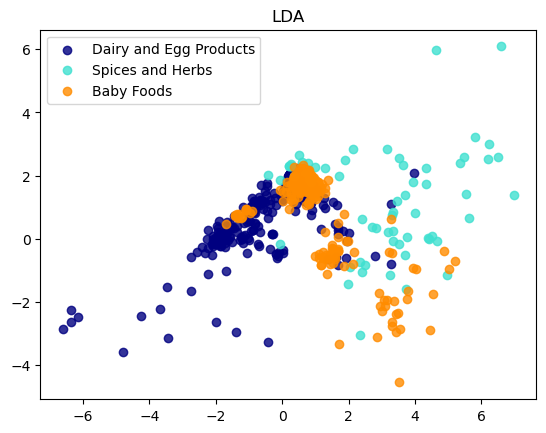

In [7]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Loading dataset 
df = pd.read_csv('nndb_flat.csv')
# Drop columns that won't be used in the analysis
df = df.drop(columns=['ID', 'CommonName', 'MfgName', 'ScientificName'])

# Converting the 'FoodGroup' column to numerical labels for analysis
labels, uniques = pd.factorize(df['FoodGroup'])
# Updating dataframe with these numerical labels
df['FoodGroup'] = labels

# Preparing features matrix 'X_' by dropping non-feature columns and the target variable
X_ = df.drop(columns=['FoodGroup', 'ShortDescrip', 'Descrip']).values
# Define the target variable 'y' from the factorized 'FoodGroup' column
y = df['FoodGroup']

# Standardizing feature matrix to have mean=0 and variance=1, which helps LDA perform better
X = StandardScaler().fit_transform(X_)

# Initializing LDA model
lda = LinearDiscriminantAnalysis()
# Fitting LDA model on the standardized data and transform it to lower-dimensional space
X_r2 = lda.fit(X, y).transform(X)

# Defining colors for plotting the different classes
colors = ['navy', 'turquoise', 'darkorange']
# Extracting unique names of the food groups for labeling
target_names = uniques
# Creating new figure for plotting
plt.figure()

# Plotting each class in 2D space after LDA transformation
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
   plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
               label=target_name)

# Addinglegend with best location, no shadow, and one scatter point in legend entries
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA')
plt.show()


In [3]:
# Having performed PCA and LDA on the 'nndb_flat.csv' data and graphing
# the lower dimensions, we are able to see several things:

# LDA:
# LDA appears to give a clean differentiation between the different food groups. This makes sense because LDA actually attempts to maximize class separability.
# LDA's resulting clusters are more definitive, and inter-class overlap is less.
# Axes on the LDA plot are unscaled, they're merely the directions with which to separately best
#    the classes, and that's to be expected for LDA because maximizing class separation is at its very core.

# PCA:
# PCA gives more overlap between points of different classes than LDA.
# PCA axes have variance that is not as spread out and the axes are scaled with
#    explained by the components. This is typical for PCA, which primarily seeks variance
#    and secondarily class separability.
# PCA is not as good at distinguishing classes as LDA because it does not use class label
#    information when selecting the principal components.

# Overall, while PCA provides a projection that explains the most variance in the data,
# LDA gives better class separability by leveraging the provided class labels to learn a projection
# that maximizes the difference in means between classes that are dissimilar while minimizing
# the spread across each class.